# Data Preprocess

## Import Library and Read Data

In [ ]:
#import library
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/News_Classification/bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## Check dataset

In [ ]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
#check data null
df.isnull().value_counts()

category  text 
False     False    2225
dtype: int64

In [ ]:
#check data category
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

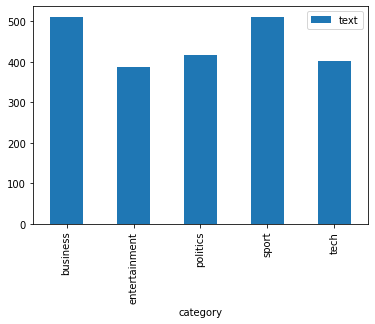

In [ ]:
df.groupby('category').count().plot.bar(ylim=0)

## Data Preprocessing

In [ ]:
#Melakukan mapping post tag untuk first character 
import nltk
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_tag(kata):
    tag_kata = nltk.pos_tag([kata])[0][1][0].upper()
    dictionary = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB,"R": wordnet.ADV}
    return dictionary.get(tag_kata, wordnet.NOUN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#Melakukan preprocessing terhadap text data
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words("english"))

def preprocess(text):
  text = str(text)
  tokenized_text = text_to_word_sequence(text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
  
  #Melakukan penghapusan stopword yang ada di corpus
  text_nonstopword  =[]
  for idx,word in enumerate(tokenized_text):
    if not tokenized_text[idx] in stopwords:
      text_nonstopword.append(tokenized_text[idx])
  text_nonstopword_join = " ".join(text_nonstopword)

  #menghapus number
  text_nonnumber = "".join(i for i in text_nonstopword_join if not i.isdigit())

  #melakukan stemming
  stem= PorterStemmer()
  input_stem=nltk.word_tokenize(text_nonnumber)
  text_stem=' '.join([stem.stem(word) for word in input_stem])
        
  #melakukan lematisasi   
  lem = WordNetLemmatizer()
  input_lem = nltk.word_tokenize(text_stem)
  text_lem= ' '.join([lem.lemmatize(word, get_tag(word)) for word in input_lem])
  return text_lem


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df["text"] = df["text"].apply(preprocess)
df.head()

,category,text
0,tech,tv futur hand viewer home theatr system plasma...
1,business,worldcom bos left book alon former worldcom bo...
2,sport,tiger wari farrel gambl leicest say rush make ...
3,sport,yead face newcastl fa cup premiership side new...
4,entertainment,ocean twelv raid box offic ocean twelv crime c...


In [ ]:
df.to_csv("drive/MyDrive/News_Classification/preprocess-bbc-text.csv")

In [ ]:
#Tokenize text data preprocess
import nltk
nltk.download('punkt')

df["tokenized_text"]=""
for index, text in enumerate(df["text"]):
  df.at[index,"tokenized_text"]= str(nltk.word_tokenize(text))
df['tokenized_text']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       ['tv', 'futur', 'hand', 'viewer', 'home', 'the...
1       ['worldcom', 'bos', 'left', 'book', 'alon', 'f...
2       ['tiger', 'wari', 'farrel', 'gambl', 'leicest'...
3       ['yead', 'face', 'newcastl', 'fa', 'cup', 'pre...
4       ['ocean', 'twelv', 'raid', 'box', 'offic', 'oc...
                              ...                        
2220    ['car', 'pull', 'u', 'retail', 'figur', 'u', '...
2221    ['kilroy', 'unveil', 'immigr', 'polici', 'ex',...
2222    ['rem', 'announc', 'new', 'glasgow', 'concert'...
2223    ['polit', 'squabbl', 'snowbal', 'becom', 'comm...
2224    ['souness', 'delight', 'euro', 'progress', 'bo...
Name: tokenized_text, Length: 2225, dtype: object

In [ ]:
df["text"]

0       tv futur hand viewer home theatr system plasma...
1       worldcom bos left book alon former worldcom bo...
2       tiger wari farrel gambl leicest say rush make ...
3       yead face newcastl fa cup premiership side new...
4       ocean twelv raid box offic ocean twelv crime c...
                              ...                        
2220    car pull u retail figur u retail sale fell jan...
2221    kilroy unveil immigr polici ex chatshow host r...
2222    rem announc new glasgow concert u band rem ann...
2223    polit squabbl snowbal becom commonplac argu bl...
2224    souness delight euro progress bos graem sounes...
Name: text, Length: 2225, dtype: object

In [ ]:
#Split dataset
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=False)

x_train = df_train["tokenized_text"]
y_train = df_train["category"]
x_test = df_test["tokenized_text"]
y_test = df_test["category"]

x_train

841     ['dominici', 'back', 'lacklustr', 'franc', 'wi...
1748    ['id', 'theft', 'surg', 'hit', 'u', 'consum', ...
2118    ['blair', 'press', 'u', 'climat', 'toni', 'bla...
1174    ['realli', 'divid', 'parti', 'gap', 'labour', ...
1502    ['iran', 'budget', 'seek', 'state', 'sell', 'o...
                              ...                        
1033    ['labour', 'eu', 'propaganda', 'taxpay', 'subs...
1731    ['crossrail', 'link', 'get', 'go', 'ahead', '£...
763     ['share', 'rise', 'new', 'man', 'utd', 'offer'...
835     ['rock', 'star', 'su', 'ex', 'girlfriend', 'mo...
1653    ['file', 'swapper', 'readi', 'new', 'network',...
Name: tokenized_text, Length: 1780, dtype: object

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1780,)
(445,)


In [ ]:
#Tokenize data and create into matrix
from tensorflow import keras

tokenizer = keras.preprocessing.text.Tokenizer(num_words=1000, char_level=False)
tokenizer.fit_on_texts(df_train["text"])
x_train_matrix = tokenizer.texts_to_matrix(df_train["text"])
x_test_matrix = tokenizer.texts_to_matrix(df_test["text"])

x_train_matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#Encoding
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

# Convert label strings to numbered index
encoder = LabelEncoder().fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)

y_train_enc

array([3, 0, 2, ..., 0, 1, 4])

In [ ]:
# Converts the labels to a one-hot representation

number_class = np.max(y_train_enc) + 1
y_train_oh = keras.utils.to_categorical(y_train_enc, number_class)
y_test_oh = keras.utils.to_categorical(y_test_enc, number_class)

print(y_train_oh)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


# Data Classification

## Keras layer

In [ ]:
layers = keras.layers
models = keras.models

In [ ]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(1000,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(number_class))
model.add(layers.Activation('softmax'))

#compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train the model
result = model.fit(x_train_matrix, y_train_oh, batch_size=30, epochs=2, verbose=1, validation_split=0.1)

Epoch 1/2
54/54 [==============================] - 3s 8ms/step - loss: 0.4303 - accuracy: 0.8770 - val_loss: 0.1054 - val_accuracy: 0.9607
Epoch 2/2
54/54 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9944 - val_loss: 0.0717 - val_accuracy: 0.9719


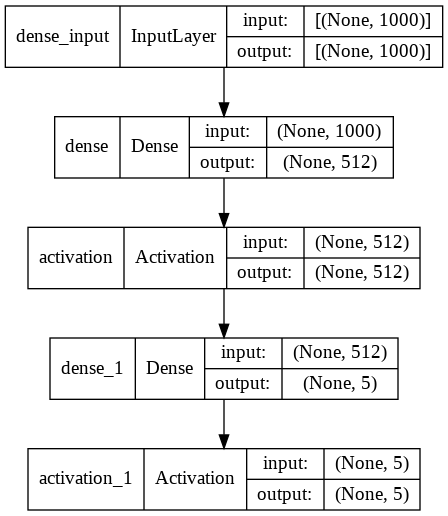

In [ ]:
#Melihat model yang dibantuk
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Evaluate score of keras model
score = model.evaluate(x_train_matrix, y_train_oh,batch_size=30, verbose=1)
print('Test accuracy score:', score[1])
print('Test loss score:', score[0])

60/60 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9972
Test accuracy score: 0.9971910119056702
Test loss score: 0.02018641121685505


In [ ]:
# Try to predict
rows =[]
for i in range(10):
  x_input = model.predict(np.array([x_test_matrix[i]]))
  y_predict = encoder.classes_[np.argmax(x_input)]
  rows.append([df_test["text"].iloc[i],y_predict, df_test["category"].iloc[i]])

#print table result of prediction
tabel_result = pd.DataFrame(rows, columns=["Input", "Prediction", "Actual"])
tabel_result

,Input,Prediction,Actual
0,drive save festiv holiday effort make protect ...,politics,politics
1,offici respond court row australian tenni top ...,sport,sport
2,cup holder man utd visit everton holder manche...,sport,sport
3,adriano chelsea link reject adriano agent gilm...,sport,sport
4,driscol gregan lead aid star ireland brian dri...,sport,sport
5,spector face legal action music produc phil sp...,entertainment,entertainment
6,uk head wrong way howard toni blair chanc tack...,politics,politics
7,venezuela review foreign deal venezuela review...,business,business
8,qanta see profit fli record australian airlin ...,business,business
9,greek sprinter run career sprinter kosta kente...,sport,sport


## TFIDF dan Shalow Algortima

In [ ]:
#import library
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import model_selection, svm, tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Menggunakan algoritma shalow machine untuk training model and predict

#Decision Tree
model_dtl = Pipeline([('tfidf', TfidfVectorizer()),('dt', DecisionTreeClassifier()),])
y_predict_dtl = model_dtl.fit(x_train, y_train).predict(x_test)
print("-------------------------------------------------------------\nUsing Decision Tree Learning")
print(classification_report(y_predict_dtl, y_test, target_names=df['category'].unique()))

-------------------------------------------------------------
Using Decision Tree Learning
               precision    recall  f1-score   support

         tech       0.86      0.85      0.85        98
     business       0.80      0.82      0.81        79
        sport       0.83      0.81      0.82        77
entertainment       0.89      0.91      0.90       110
     politics       0.89      0.88      0.88        81

     accuracy                           0.86       445
    macro avg       0.85      0.85      0.85       445
 weighted avg       0.86      0.86      0.86       445



In [ ]:
#XGBoost
model_xgb = Pipeline([('tfidf', TfidfVectorizer()),('xgb', XGBClassifier(n_estimators=100)),])
y_predict_xgb = model_xgb.fit(x_train, y_train).predict(x_test)
print("\n-------------------------------------------------------------\nUsing XGboost")
print(classification_report(y_predict_xgb, y_test, target_names=df['category'].unique()))


-------------------------------------------------------------
Using XGboost
               precision    recall  f1-score   support

         tech       0.95      0.96      0.95        96
     business       0.96      0.99      0.97        79
        sport       0.96      0.95      0.95        76
entertainment       0.99      0.96      0.97       116
     politics       0.93      0.95      0.94        78

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



In [ ]:
#SVM
model_svm = Pipeline([('tfidf', TfidfVectorizer()),('svm', svm.SVC(kernel='linear', C=0.1, degree=3)),])
y_predict_svm = model_svm.fit(x_train, y_train).predict(x_test)
print("\n-------------------------------------------------------------\nUsing SVM")
print(classification_report(y_predict_svm, y_test, target_names=df['category'].unique()))


-------------------------------------------------------------
Using SVM
               precision    recall  f1-score   support

         tech       1.00      0.89      0.94       109
     business       0.93      1.00      0.96        75
        sport       0.88      1.00      0.94        66
entertainment       1.00      0.95      0.97       118
     politics       0.96      1.00      0.98        77

     accuracy                           0.96       445
    macro avg       0.95      0.97      0.96       445
 weighted avg       0.96      0.96      0.96       445



In [ ]:

#Multinomial Naive Bayes
model_mnb = Pipeline([('tfidf', TfidfVectorizer()),('MNB', MultinomialNB()),])
y_predict_mnb = model_mnb.fit(x_train, y_train).predict(x_test)
print("\n-------------------------------------------------------------\nUsing Multinomial Naive Bayes")
print(classification_report(y_predict_mnb, y_test, target_names=df['category'].unique()))


-------------------------------------------------------------
Using Multinomial Naive Bayes
               precision    recall  f1-score   support

         tech       0.98      0.98      0.98        97
     business       0.91      1.00      0.95        74
        sport       0.99      0.94      0.96        79
entertainment       1.00      0.99      1.00       113
     politics       0.99      0.96      0.98        82

     accuracy                           0.98       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.98      0.98      0.98       445



In [ ]:
#Random Forrest Classifier
model_rfc = Pipeline([('tfidf', TfidfVectorizer()),('rfc', RandomForestClassifier(n_estimators=100))])
y_predict_rfc = model_rfc.fit(x_train, y_train).predict(x_test)
print("\n-------------------------------------------------------------\nUsing Random Forrest Classifier")
print(classification_report(y_predict_rfc, y_test, target_names=df['category'].unique()))


-------------------------------------------------------------
Using Random Forrest Classifier
               precision    recall  f1-score   support

         tech       0.98      0.95      0.96       100
     business       0.96      0.99      0.97        79
        sport       0.93      0.97      0.95        72
entertainment       1.00      0.97      0.98       116
     politics       0.96      0.99      0.97        78

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



## Fine-Tuning BERT

### Proses BERT

In [ ]:
#Import library
import tensorflow as tf
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 3.3 MB 49.2 MB/s 
     |████████████████████████████████| 596 kB 44.6 MB/s 
     |████████████████████████████████| 895 kB 47.6 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#import library
import transformers
from transformers import AutoModel, BertTokenizerFast
import torch
torch.cuda.empty_cache()
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup
import time
import datetime

In [ ]:
#specify device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla K80'

In [ ]:
#Split dataset
from sklearn.model_selection import train_test_split

df_train2, df_val2 = train_test_split(df_train, test_size=0.2, random_state=False)

x_train2 = df_train2["text"]
y_train2 = df_train2["category"]
x_val2 = df_val2["text"]
y_val2 = df_val2["category"]
x_test2 = df_test["text"]
y_test2 = df_test["category"]

# Convert label strings to numbered index
encoder = LabelEncoder().fit(y_train2)
y_train2_enc = encoder.transform(y_train2)
y_val2_enc = encoder.transform(y_val2)
y_test2_enc = encoder.transform(y_test2)

y_train2_enc

array([4, 4, 3, ..., 3, 3, 3])

In [ ]:
#import bert model dan bert tokenizer
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer_bert = BertTokenizerFast.from_pretrained('bert-base-uncased')

x_train_bert_tokenize = tokenizer_bert.batch_encode_plus(x_train2.tolist(), max_length = 100, pad_to_max_length=True,truncation=True,return_token_type_ids=False)
x_val_bert_tokenize = tokenizer_bert.batch_encode_plus(x_val2.tolist(), max_length = 100, pad_to_max_length=True,truncation=True,return_token_type_ids=False)
x_test_bert_tokenize = tokenizer_bert.batch_encode_plus(x_test2.tolist(), max_length = 100, pad_to_max_length=True,truncation=True,return_token_type_ids=False)

x_train_bert_tokenize

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'input_ids': [[101, 2298, 2189, 3298, 11240, 4014, 11240, 4014, 3042, 2145, 5959, 8797, 2051, 5096, 15802, 2470, 21416, 21197, 12941, 11721, 5339, 3678, 2454, 11240, 4014, 5271, 2197, 2095, 3795, 2360, 3189, 2152, 2561, 5271, 3058, 20965, 3126, 7505, 15194, 2130, 23569, 27605, 3367, 16014, 11721, 5339, 3678, 2360, 2204, 2640, 2298, 11240, 4014, 2092, 2047, 14262, 7903, 2189, 8816, 2071, 2175, 2126, 5245, 5096, 2360, 12941, 2348, 21877, 7361, 2140, 2145, 2298, 2092, 16360, 2721, 2278, 3042, 23408, 3593, 15802, 11721, 5339, 3678, 3006, 2156, 4030, 16360, 2721, 2278, 5096, 3006, 4982, 4237, 2900, 2265, 16360, 2721, 2278, 5096, 102], [101, 4773, 2557, 2202, 3009, 9680, 3795, 6714, 2557, 13764, 1057, 2066, 2424, 20228, 4765, 2072, 3009, 11374, 6692, 2290, 2189, 2424, 2172, 3009, 11374, 6692, 2290, 5099, 6154, 5099, 6154, 9680, 5025, 8046, 2759, 3009, 3713, 2088, 2334, 3063, 19817, 7140, 16558, 3006, 2147, 6917, 1057, 4012, 26569, 3288, 9680, 5099, 6154, 4372, 9686, 9739, 4747, 4012, 18780,

In [ ]:
#Mengubah sekuens angka menjadi tensors

#data training
x_train_bert_id = torch.tensor(x_train_bert_tokenize['input_ids'])
x_train_bert_mask = torch.tensor(x_train_bert_tokenize['attention_mask'])
y_train_bert = torch.tensor(y_train2_enc.tolist())

#datatest
x_val_bert_id = torch.tensor(x_val_bert_tokenize['input_ids'])
x_val_bert_mask = torch.tensor(x_val_bert_tokenize['attention_mask'])
y_val_bert = torch.tensor(y_val2_enc.tolist())

#datatest
x_test_bert_id = torch.tensor(x_test_bert_tokenize['input_ids'])
x_test_bert_mask = torch.tensor(x_test_bert_tokenize['attention_mask'])
y_test_bert = torch.tensor(y_test2_enc.tolist())

x_train_bert_id

tensor([[  101,  2298,  2189,  ...,  2278,  5096,   102],
        [  101,  4773,  2557,  ...,  2177,  2650,   102],
        [  101,  1999,  9103,  ..., 13409,  7324,   102],
        ...,
        [  101,  5722,  8486,  ...,  2078,  2447,   102],
        [  101,  4078, 12502,  ...,  2078, 27843,   102],
        [  101, 11338,  4014,  ..., 13238,  2444,   102]])

In [ ]:
# Membungkus dengan tensor
x_train_bert = TensorDataset(x_train_bert_id, x_train_bert_mask, y_train_bert)
x_val_bert = TensorDataset(x_val_bert_id, x_val_bert_mask, y_val_bert)

# Ambil random sampling untuk training
sample_x = RandomSampler(x_train_bert)
sample_x_val = RandomSampler(x_val_bert)

# Melakukan dataLoader untuk training data
x_train_loader = DataLoader(x_train_bert, sampler=sample_x, batch_size=32)
x_val_loader = DataLoader(x_val_bert, sampler=sample_x_val, batch_size=32)

x_train_loader

In [ ]:
def train(model_bert, optimizer_bert, train_dataloader, val_dataloader, epochs = 4, print_update_every = 40):
  loss_values = []
  total_steps = len(train_dataloader) * epochs
  scheduler = get_linear_schedule_with_warmup(optimizer_bert, 
                                              num_warmup_steps = 0, 
                                              num_training_steps = total_steps)
  #Melakukan training tiap epochnya
  for epoch_i in range(0, epochs):
      print('\n======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
      print('Melakuakan Training')
      model_bert.train()
      
      #melakukan kalkulasi terhadap waktu
      t0 = time.time()
      total_loss = 0 

      #Untuk setiap batch dari training data
      for step, batch in enumerate(train_dataloader):

          #Melakukan update untuk setiap masukkan 40 batch
          if step % print_update_every == 0 and not step == 0:

              #Mengkalkulasi waktu yang dibuang
              elapsed = change_format_time(time.time() - t0)
              print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

          # Setiap batch memiliki pytorch tensor [0]: input ids [1]: attention masks [2]: labels 
          batch_input_ids = batch[0].to(device)
          batch_input_mask = batch[1].to(device)
          batch_labels = batch[2].to(device)

          # Menghapus kalkulasi gradien sebelumnya sebelum melakukan backward
          model_bert.zero_grad()        

          # Melakukan forward passing
          outputs = model_bert(batch_input_ids, 
                      token_type_ids=None, 
                      attention_mask=batch_input_mask, 
                      labels=batch_labels)
          
          # Mengambil loss value dari model
          loss = outputs[0]

          # Mengakumulasi training loss untuk semua batch sehingga kita dapat mengkalkulasi rata-rata loss di akhir
          total_loss += loss.item()

          # Melakukan proses backward
          loss.backward()

          # Melakukan klipping menjadi bentuk gradien 1, mencegah exploading gradien
          torch.nn.utils.clip_grad_norm_(model_bert.parameters(), 1.0)

          # Melakukan update parameter dan step dengan komputer gradien
          optimizer_bert.step()

          # Mengupdate learning rate
          scheduler.step()

      # Mengkalkulasi rata-rata training loss dan memasukkannnya ke loss value
      avg_train_loss = total_loss / len(train_dataloader)           
      loss_values.append(avg_train_loss)
      print("")
      print("  Average training loss: {0:.2f}".format(avg_train_loss))
      print("  Training epoch took: {:}".format(change_format_time(time.time() - t0)))
          
      #Melakukan proses validasi
      print("")
      print("Melakukan Validation")

      t0 = time.time()

      #Melakukan evaluasi terhadap model
      model_bert.eval()
      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0

      # Evaluasi data dari tiap batch dalam satu epoch
      for batch in val_dataloader:
          
          # Memasukkan batch ke GPU
          batch = tuple(t.to(device) for t in batch)
          
          # mengunpack data loader [0] imput ids [1] attention mask [2] label
          batch_input_ids, batch_input_mask, batch_labels = batch
          
          with torch.no_grad():        
            # Melakukan forward passing dan predic logits
             outputs = model_bert(batch_input_ids, 
                              token_type_ids=None, 
                              attention_mask=batch_input_mask)
          
          # Mengambil nilai logits dari output
          logits = outputs[0]

          # Mrmindahkan logits dan label ids ke cpu
          logits = logits.detach().cpu().numpy()
          label_ids = batch_labels.to('cpu').numpy()
          
          # Menghitung kalkulasi final, total kalkulasi akuras
          tmp_eval_accuracy = flat_accuracy(logits, label_ids)
          eval_accuracy += tmp_eval_accuracy

          # Menghitung nilai batch
          nb_eval_steps += 1

      # Kurasi akhir dari proses calidasi ini 
      print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
      print("  Validation took: {:}".format(change_format_time(time.time() - t0)))

In [ ]:
# Menghubah waktu dalam detik menjadi jam:menit:detik
def change_format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

# Mengkalkulasi akurasi dari prediction vs label kita
def flat_accuracy(preds, labels):
    prediction_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(prediction_flat == labels_flat) / len(labels_flat)

# Melakukan print terhadap parameter dari model yang dimliki
def parameter_model(model):
  params = list(model.named_parameters())

  print('The BERT model has {:} different named parameters.\n'.format(len(params)))
  
  #Parameter 0 hingga 4 untuk embeding layer
  print("\n-------------------------------------------------------------")
  print("Layer Embedding\n")
  for p in params[0:5]:
      print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
  
  #Parameter 5 hingga 20 untuk first transformer
  print("\n-------------------------------------------------------------")
  print("Transformer Pertama\n")
  for p in params[5:21]:
      print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
  
  #Parameter sisanya untuk output
  print("\n-------------------------------------------------------------")
  print("Layer Output\n")
  for p in params[-4:]:
      print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

### BERT-Base Multilingual

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model_multilingual = BertForSequenceClassification.from_pretrained(
    'bert-base-multilingual-cased',
    output_attentions = False,
    output_hidden_states = False,
    num_labels = 5
)

if device.type == 'cuda':
  model_multilingual = model_multilingual.to(device)

parameter_model(model_multilingual)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

The BERT model has 201 different named parameters.


-------------------------------------------------------------
Layer Embedding

bert.embeddings.word_embeddings.weight                  (119547, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

-------------------------------------------------------------
Transformer Pertama

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.att

In [ ]:
optimizer_multilingual = AdamW(model_multilingual.parameters(), lr = 1e-5)
optimizer_multilingual

AdamW (
Parameter Group 0
    betas: (0.9, 0.999)
    correct_bias: True
    eps: 1e-06
    lr: 1e-05
    weight_decay: 0.0
)

In [ ]:
train(model_multilingual, optimizer_multilingual, x_train_loader, x_val_loader)


======== Epoch 1 / 4 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 1.61
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.20
  Validation took: 0:00:04

======== Epoch 2 / 4 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:44.

  Average training loss: 1.58
  Training epoch took: 0:00:49

Melakukan Validation
  Accuracy: 0.26
  Validation took: 0:00:04

======== Epoch 3 / 4 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 1.46
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.45
  Validation took: 0:00:04

======== Epoch 4 / 4 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 1.29
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.49
  Validation took: 0:00:04


In [ ]:
from sklearn.metrics import classification_report

# get predictions for test data
with torch.no_grad():
  preds_multilingual = model_multilingual(x_test_bert_id.to(device), x_test_bert_mask.to(device))
  preds_multilingual = preds_multilingual.logits.detach().cpu().numpy()

# model's performance
preds_multilingual = np.argmax(preds_multilingual, axis = 1)
print(classification_report(y_test_bert, preds_multilingual, target_names=df['category'].unique()))

               precision    recall  f1-score   support

         tech       0.45      0.88      0.59        97
     business       0.75      0.57      0.65        81
        sport       0.89      0.32      0.47        75
entertainment       0.61      0.88      0.72       112
     politics       1.00      0.09      0.16        80

     accuracy                           0.58       445
    macro avg       0.74      0.55      0.52       445
 weighted avg       0.72      0.58      0.54       445



**Do more training and increase epoch**

In [ ]:
train(model_multilingual, optimizer_multilingual, x_train_loader, x_val_loader, 7)


======== Epoch 1 / 7 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 1.16
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.67
  Validation took: 0:00:04

======== Epoch 2 / 7 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.82
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.71
  Validation took: 0:00:04

======== Epoch 3 / 7 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.63
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.78
  Validation took: 0:00:04

======== Epoch 4 / 7 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.46
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.80
  Validation took: 0:00:04

======== Epoch 5 / 7 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45

In [ ]:
from sklearn.metrics import classification_report

# get predictions for test data
with torch.no_grad():
  preds_multilingual = model_multilingual(x_test_bert_id.to(device), x_test_bert_mask.to(device))
  preds_multilingual = preds_multilingual.logits.detach().cpu().numpy()

# model's performance
preds_multilingual = np.argmax(preds_multilingual, axis = 1)
print(classification_report(y_test_bert, preds_multilingual, target_names=df['category'].unique()))

               precision    recall  f1-score   support

         tech       0.91      0.85      0.88        97
     business       0.93      0.78      0.85        81
        sport       0.80      0.89      0.84        75
entertainment       0.96      0.93      0.95       112
     politics       0.74      0.88      0.80        80

     accuracy                           0.87       445
    macro avg       0.87      0.86      0.86       445
 weighted avg       0.88      0.87      0.87       445



**Do more training once more and increase epoch**

In [ ]:
train(model_multilingual, optimizer_multilingual, x_train_loader, x_val_loader, 10)


======== Epoch 1 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.30
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.81
  Validation took: 0:00:04

======== Epoch 2 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.23
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.85
  Validation took: 0:00:04

======== Epoch 3 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.18
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.88
  Validation took: 0:00:04

======== Epoch 4 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.11
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.87
  Validation took: 0:00:04

======== Epoch 5 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:

In [ ]:
from sklearn.metrics import classification_report

# get predictions for test data
with torch.no_grad():
  preds_multilingual = model_multilingual(x_test_bert_id.to(device), x_test_bert_mask.to(device))
  preds_multilingual = preds_multilingual.logits.detach().cpu().numpy()

# model's performance
preds_multilingual = np.argmax(preds_multilingual, axis = 1)
print(classification_report(y_test_bert, preds_multilingual, target_names=df['category'].unique()))

               precision    recall  f1-score   support

         tech       0.94      0.91      0.92        97
     business       0.96      0.86      0.91        81
        sport       0.87      0.89      0.88        75
entertainment       0.98      0.93      0.95       112
     politics       0.80      0.95      0.87        80

     accuracy                           0.91       445
    macro avg       0.91      0.91      0.91       445
 weighted avg       0.92      0.91      0.91       445



In [ ]:
train(model_multilingual, optimizer_multilingual, x_train_loader, x_val_loader, 15)


======== Epoch 1 / 15 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.03
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.88
  Validation took: 0:00:04

======== Epoch 2 / 15 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.06
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.84
  Validation took: 0:00:04

======== Epoch 3 / 15 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.12
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.85
  Validation took: 0:00:04

======== Epoch 4 / 15 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:45.

  Average training loss: 0.04
  Training epoch took: 0:00:50

Melakukan Validation
  Accuracy: 0.89
  Validation took: 0:00:04

======== Epoch 5 / 15 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:

In [ ]:
from sklearn.metrics import classification_report

# get predictions for test data
with torch.no_grad():
  preds_multilingual = model_multilingual(x_test_bert_id.to(device), x_test_bert_mask.to(device))
  preds_multilingual = preds_multilingual.logits.detach().cpu().numpy()

# model's performance
preds_multilingual = np.argmax(preds_multilingual, axis = 1)
print(classification_report(y_test_bert, preds_multilingual, target_names=df['category'].unique()))

               precision    recall  f1-score   support

         tech       0.92      0.91      0.91        97
     business       0.97      0.90      0.94        81
        sport       0.88      0.91      0.89        75
entertainment       0.98      0.96      0.97       112
     politics       0.86      0.94      0.90        80

     accuracy                           0.93       445
    macro avg       0.92      0.92      0.92       445
 weighted avg       0.93      0.93      0.93       445



In [ ]:
# Save the model
!mkdir -p saved_model
model_multilingual.save_pretrained('saved_model/model_multilingual_bert')

### DistilBERT

In [ ]:
# distillBERT base uncased
model_distill= BertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    output_attentions = False, 
    output_hidden_states = False,
    num_labels = 5
  )

if device.type == 'cuda':
  # push the model to GPU
  model_distill = model_distill.to(device)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing BertForSequenceClassification: ['distilbert.embeddings.LayerNorm.weight', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.3.attention.out_lin.weight', 'distilbert.transformer.layer.2.ffn.lin2.weight', 'distilbert.transformer.layer.5.attention.out_lin.weight', 'distilbert.transformer.layer.1.attention.out_lin.weight', 'distilbert.transformer.layer.3.attention.k_lin.bias', 'distilbert.transformer.layer.2.attention.k_lin.bias', 'distilbert.transformer.layer.1.attention.v_lin.weight', 'distilbert.transformer.layer.2.ffn.lin1.bias', 'distilbert.transformer.layer.4.attention.k_lin.weight', 'distilbert.embeddings.word_embeddings.weight', 'distilbert.transformer.layer.4.attention.v_lin.weight', 'distilbert.transformer.layer.3.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'vocab_projector.weight', 'distilbert.transformer.layer.2.ffn.lin2

In [ ]:
optimizer_distill = AdamW(model_distill.parameters(), lr = 1e-5)
optimizer_distill

AdamW (
Parameter Group 0
    betas: (0.9, 0.999)
    correct_bias: True
    eps: 1e-06
    lr: 1e-05
    weight_decay: 0.0
)

In [ ]:
train(model_distill, optimizer_distill, x_train_loader, x_val_loader)


======== Epoch 1 / 4 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 1.63
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.18
  Validation took: 0:00:04

======== Epoch 2 / 4 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 1.59
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.23
  Validation took: 0:00:04

======== Epoch 3 / 4 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 1.59
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.23
  Validation took: 0:00:04

======== Epoch 4 / 4 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 1.56
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.28
  Validation took: 0:00:04


In [ ]:
from sklearn.metrics import classification_report

# get predictions for test data
with torch.no_grad():
  preds_bert_distill = model_distill(x_test_bert_id.to(device), x_test_bert_mask.to(device))
  preds_bert_distill = preds_bert_distill.logits.detach().cpu().numpy()

# model's performance
preds_bert_distill = np.argmax(preds_bert_distill, axis = 1)
print(classification_report(y_test_bert, preds_bert_distill, target_names=df['category'].unique()))

               precision    recall  f1-score   support

         tech       0.85      0.40      0.55        97
     business       0.00      0.00      0.00        81
        sport       0.00      0.00      0.00        75
entertainment       0.28      1.00      0.44       112
     politics       0.00      0.00      0.00        80

     accuracy                           0.34       445
    macro avg       0.23      0.28      0.20       445
 weighted avg       0.26      0.34      0.23       445



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Do more training and increase epoch**

In [ ]:
train(model_distill, optimizer_distill, x_train_loader, x_val_loader,10)


======== Epoch 1 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 1.47
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.66
  Validation took: 0:00:04

======== Epoch 2 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 1.15
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.65
  Validation took: 0:00:04

======== Epoch 3 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 0.86
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.66
  Validation took: 0:00:04

======== Epoch 4 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 0.70
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.72
  Validation took: 0:00:04

======== Epoch 5 / 10 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:

In [ ]:
from sklearn.metrics import classification_report

# get predictions for test data
with torch.no_grad():
  preds_bert_distill = model_distill(x_test_bert_id.to(device), x_test_bert_mask.to(device))
  preds_bert_distill = preds_bert_distill.logits.detach().cpu().numpy()

# model's performance
preds_bert_distill = np.argmax(preds_bert_distill, axis = 1)
print(classification_report(y_test_bert, preds_bert_distill, target_names=df['category'].unique()))

               precision    recall  f1-score   support

         tech       0.87      0.90      0.88        97
     business       0.96      0.86      0.91        81
        sport       0.88      0.96      0.92        75
entertainment       0.97      1.00      0.99       112
     politics       0.87      0.81      0.84        80

     accuracy                           0.91       445
    macro avg       0.91      0.91      0.91       445
 weighted avg       0.91      0.91      0.91       445



**Do more training and increase epoch**

In [ ]:
train(model_distill, optimizer_distill, x_train_loader, x_val_loader,50)


======== Epoch 1 / 50 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 0.18
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.90
  Validation took: 0:00:04

======== Epoch 2 / 50 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 0.15
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.82
  Validation took: 0:00:04

======== Epoch 3 / 50 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 0.13
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.92
  Validation took: 0:00:04

======== Epoch 4 / 50 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:00:43.

  Average training loss: 0.08
  Training epoch took: 0:00:48

Melakukan Validation
  Accuracy: 0.91
  Validation took: 0:00:04

======== Epoch 5 / 50 ========
Melakuakan Training
  Batch    40  of     45.    Elapsed: 0:

In [ ]:
from sklearn.metrics import classification_report

# get predictions for test data
with torch.no_grad():
  preds_bert_distill = model_distill(x_test_bert_id.to(device), x_test_bert_mask.to(device))
  preds_bert_distill = preds_bert_distill.logits.detach().cpu().numpy()

# model's performance
preds_bert_distill = np.argmax(preds_bert_distill, axis = 1)
print(classification_report(y_test_bert, preds_bert_distill, target_names=df['category'].unique()))

               precision    recall  f1-score   support

         tech       0.94      0.93      0.93        97
     business       0.96      0.93      0.94        81
        sport       0.91      0.93      0.92        75
entertainment       0.98      1.00      0.99       112
     politics       0.94      0.94      0.94        80

     accuracy                           0.95       445
    macro avg       0.95      0.94      0.95       445
 weighted avg       0.95      0.95      0.95       445



In [ ]:
# Save the model
model_distill.save_pretrained('saved_model/model_distill_bert')

## Word2Vec


In [ ]:
#using gensim data
import gensim
import gensim.downloader as gensim_api
gen = gensim_api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#membuat list unigram
unigram_corpus = []
for sentence in df_train["text"]:
  uniword = sentence.split()
  unigram = [" ".join(uniword[i:i+1]) for i in range(0,len(uniword),1)]
  unigram_corpus.append(unigram)

In [ ]:
#Mendeteksi unigram
bigram = gensim.models.phrases.Phrases(unigram_corpus, min_count=5, threshold=10)
bigram = gensim.models.phrases.Phraser(bigram)
unigram_corpus = list(bigram[unigram_corpus])

#Mendeteksi trigram
trigram = gensim.models.phrases.Phrases(bigram[unigram_corpus], min_count=5, threshold=10)
trigram = gensim.models.phrases.Phraser(trigram)
unigram_corpus = list(trigram[unigram_corpus])


In [ ]:
#transorm menjadi vector
gen = gensim.models.word2vec.Word2Vec(unigram_corpus, size=100, window=5, min_count=1, sg=1, iter=30)

gen

In [ ]:
#Feature engineering

#Melakukan preprocess korpus dari list unigram yang suda diproses menjadi word2vec menjadi list sequence
from tensorflow.keras import models, layers, preprocessing as kprocessing

tokenize = kprocessing.text.Tokenizer(lower=True, split=' ', oov_token="NaN", filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenize.fit_on_texts(unigram_corpus)
vocabulary = tokenize.word_index
print(tokenize)

#membuat sekuense
unigram_text_to_seq = tokenize.texts_to_sequences(unigram_corpus)

#melakukan padding untuk sequnece
x_train_w2v = kprocessing.sequence.pad_sequences(unigram_text_to_seq, maxlen=15, padding="post", truncating="post")


In [ ]:
# Test data tokenize
unigram_corpus_test = []
for sentence in df_test["text"]:
  uniword_test = sentence.split()
  unigram_test = [" ".join(uniword_test[i:i+1]) for i in range(0,len(uniword_test),1)]
  unigram_corpus_test.append(unigram_test)

unigram_corpus_test = list(bigram[unigram_corpus_test])
unigram_corpus_test = list(trigram[unigram_corpus_test])

unigram_text_to_seq_test = tokenize.texts_to_sequences(unigram_corpus_test)
x_test_w2v = kprocessing.sequence.pad_sequences(unigram_text_to_seq_test, maxlen=15,padding="post", truncating="post")


In [ ]:
#membuat matriks embeding
matriks_embedding = np.zeros((len(vocabulary)+1, 300))
for kata,i in vocabulary.items():
    try:
        matriks_embedding[i] =  gen[kata]
    except:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
word = "whether"
print("dic[word]:", vocabulary[word], "|idx")
print("embeddings[idx]:", matriks_embedding[vocabulary[word]].shape, 
      "|vector")

dic[word]: 477 |idx
embeddings[idx]: (300,) |vector


In [ ]:
#Membuat deeplearning modelnya

#Attention layer : untuk mengcapture bobot dari tiap instance
#2 layer menggunakan bidirectional LSTM
#2 dense layer untuk memprefiksi probabilitas dari berita di tiap kategori

def layer_attent(input, neuron):
    layer = layers.Permute((2,1))(input)
    layer = layers.Dense(neuron, activation="softmax")(layer)
    layer = layers.Permute((2,1), name="attention")(layer)
    layer = layers.multiply([input, layer])
    return layer

# layer untuk input
layer_input = layers.Input(shape=(15,))

## layer untuk embedding
layer_embedding = layers.Embedding(input_dim=matriks_embedding.shape[0],  output_dim=matriks_embedding.shape[1], weights=[matriks_embedding],input_length=15, trainable=False)(layer_input)

# layer attention
layer_attentional = layer_attent(layer_embedding, neuron=15)

# Layer untuk bidirectional lstm
layer_lstm = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, return_sequences=True))(layer_attentional)
layer_lstm = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(layer_lstm)

## Layer Dense 
layer_dense = layers.Dense(64, activation='relu')(layer_lstm)
layer_output = layers.Dense(5, activation='softmax')(layer_dense)

## compile
model_w2v = models.Model(layer_input, layer_output)
model_w2v.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model_w2v.summary()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 15)]         0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 15, 300)      5933700     ['input_11[0][0]']               
                                                                                                  
 permute_9 (Permute)            (None, 300, 15)      0           ['embedding_10[0][0]']           
                                                                                                  
 dense_26 (Dense)               (None, 300, 15)      240         ['permute_9[0][0]']              
                                                                                            

In [ ]:
dic_y_mapping = {label:n for n,label in 
                 enumerate(np.unique(df_train['category']))}
dic_y_mapping

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [ ]:
y_train_w2v = np.array([dic_y_mapping[y] for y in df_train['category']])
y_train_w2v

array([3, 0, 2, ..., 0, 1, 4])

In [ ]:
print(x_train_w2v)

[[7968   35 6158 ...  206   31 6158]
 [2649 2878 1789 ...  258 1832 2878]
 [1161  813    6 ...  246 6979 5090]
 ...
 [  90   75    9 ... 7701 6047  558]
 [6452 1755  935 ...  128 4835   63]
 [ 420 8834  953 ...  107   92   15]]


In [ ]:
y_train_oh

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
trained = model_w2v.fit(x=x_train_w2v, y=y_train_oh, batch_size=256, 
                     epochs=20, shuffle=True, 
                     validation_split=0.3)

Epoch 1/20
5/5 [==============================] - 12s 723ms/step - loss: 1.6092 - accuracy: 0.2416 - val_loss: 1.6093 - val_accuracy: 0.2097
Epoch 2/20
5/5 [==============================] - 1s 184ms/step - loss: 1.6086 - accuracy: 0.2416 - val_loss: 1.6091 - val_accuracy: 0.2097
Epoch 3/20
5/5 [==============================] - 1s 185ms/step - loss: 1.6079 - accuracy: 0.2303 - val_loss: 1.6090 - val_accuracy: 0.2097
Epoch 4/20
5/5 [==============================] - 1s 179ms/step - loss: 1.6074 - accuracy: 0.2303 - val_loss: 1.6090 - val_accuracy: 0.2097
Epoch 5/20
5/5 [==============================] - 1s 179ms/step - loss: 1.6069 - accuracy: 0.2303 - val_loss: 1.6089 - val_accuracy: 0.2097
Epoch 6/20
5/5 [==============================] - 1s 181ms/step - loss: 1.6065 - accuracy: 0.2303 - val_loss: 1.6088 - val_accuracy: 0.2097
Epoch 7/20
5/5 [==============================] - 1s 187ms/step - loss: 1.6060 - accuracy: 0.2303 - val_loss: 1.6088 - val_accuracy: 0.2097
Epoch 8/20
5/5 [===